In [1]:
!pip install apyori

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from apyori import apriori
import utils
%matplotlib inline

In [3]:
df = pd.read_csv('house_votes.csv')

In [4]:
df

,Class Name,Handicapped Infants,Water Project Cost Sharing,Adoption of the budget,Physical Fee freeze,El Salvador Aid,Religious Groups in Schools,Anti Satellite Test Ban,Aid to Nigaragun Contras,MX Missile,Immigration,Synfuels Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act
0,republican,No,Yes,No,Yes,Yes,Yes,No,No,No,Yes,NaN,Yes,Yes,Yes,No,Yes
1,republican,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,Yes,Yes,No,NaN
2,democrat,NaN,Yes,Yes,NaN,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No
3,democrat,No,Yes,Yes,No,NaN,Yes,No,No,No,No,Yes,No,Yes,No,No,Yes
4,democrat,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,NaN,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,No,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes
431,democrat,No,No,Yes,No,No,No,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes
432,republican,No,NaN,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes
433,republican,No,No,No,Yes,Yes,Yes,NaN,NaN,NaN,NaN,No,Yes,Yes,Yes,No,Yes


In [5]:
df.isnull().sum()

Class Name                       0
Handicapped Infants             12
Water Project Cost Sharing      48
Adoption of the budget          11
Physical Fee freeze             11
El Salvador Aid                 15
Religious Groups in Schools     11
Anti Satellite Test Ban         14
Aid to Nigaragun Contras        15
MX Missile                      22
Immigration                      7
Synfuels Cutback                21
Education Spending              31
Superfund Right to Sue          25
Crime                           17
Duty Free Exports               28
Export Administration Act      104
dtype: int64

In [6]:
catImputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
catImputer = catImputer.fit(df[['Handicapped Infants', 'Water Project Cost Sharing', 'Adoption of the budget', 'Physical Fee freeze','El Salvador Aid','Religious Groups in Schools','Anti Satellite Test Ban','Aid to Nigaragun Contras','MX Missile','Immigration','Synfuels Cutback','Education Spending','Superfund Right to Sue','Crime','Duty Free Exports', 'Export Administration Act']])
df[['Handicapped Infants', 'Water Project Cost Sharing', 'Adoption of the budget', 'Physical Fee freeze','El Salvador Aid','Religious Groups in Schools','Anti Satellite Test Ban','Aid to Nigaragun Contras','MX Missile','Immigration','Synfuels Cutback','Education Spending','Superfund Right to Sue','Crime','Duty Free Exports', 'Export Administration Act']] = catImputer.transform(df[['Handicapped Infants', 'Water Project Cost Sharing', 'Adoption of the budget', 'Physical Fee freeze','El Salvador Aid','Religious Groups in Schools','Anti Satellite Test Ban','Aid to Nigaragun Contras','MX Missile','Immigration','Synfuels Cutback','Education Spending','Superfund Right to Sue','Crime','Duty Free Exports', 'Export Administration Act']])
df

,Class Name,Handicapped Infants,Water Project Cost Sharing,Adoption of the budget,Physical Fee freeze,El Salvador Aid,Religious Groups in Schools,Anti Satellite Test Ban,Aid to Nigaragun Contras,MX Missile,Immigration,Synfuels Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act
0,republican,No,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,Yes,Yes,No,Yes
1,republican,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,Yes,Yes,No,Yes
2,democrat,No,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No
3,democrat,No,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,No,No,Yes
4,democrat,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,No,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes
431,democrat,No,No,Yes,No,No,No,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes
432,republican,No,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes
433,republican,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes


In [7]:
df.isnull().sum()

Class Name                     0
Handicapped Infants            0
Water Project Cost Sharing     0
Adoption of the budget         0
Physical Fee freeze            0
El Salvador Aid                0
Religious Groups in Schools    0
Anti Satellite Test Ban        0
Aid to Nigaragun Contras       0
MX Missile                     0
Immigration                    0
Synfuels Cutback               0
Education Spending             0
Superfund Right to Sue         0
Crime                          0
Duty Free Exports              0
Export Administration Act      0
dtype: int64

In [8]:
enc = preprocessing.OneHotEncoder()
onehots = enc.fit_transform(df[['Class Name']]). toarray()

# Creating the new df

cols = []
for i in enc.categories_:
    cols.extend(i)
df = df.join(pd.DataFrame(onehots, columns = cols))
df = df.drop(['Class Name'], axis = 1)

df

,Handicapped Infants,Water Project Cost Sharing,Adoption of the budget,Physical Fee freeze,El Salvador Aid,Religious Groups in Schools,Anti Satellite Test Ban,Aid to Nigaragun Contras,MX Missile,Immigration,Synfuels Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act,democrat,republican
0,No,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,Yes,Yes,No,Yes,0.0,1.0
1,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,Yes,Yes,No,Yes,0.0,1.0
2,No,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,1.0,0.0
3,No,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,No,No,Yes,1.0,0.0
4,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,No,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,0.0,1.0
431,No,No,Yes,No,No,No,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,1.0,0.0
432,No,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,0.0,1.0
433,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,0.0,1.0


In [9]:
df['democrat'].unique()

array([0., 1.])

In [10]:
df['democrat']=df['democrat'].replace([0., 1.],['No','Yes'])

In [11]:
df

,Handicapped Infants,Water Project Cost Sharing,Adoption of the budget,Physical Fee freeze,El Salvador Aid,Religious Groups in Schools,Anti Satellite Test Ban,Aid to Nigaragun Contras,MX Missile,Immigration,Synfuels Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act,democrat,republican
0,No,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,Yes,Yes,No,Yes,No,1.0
1,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,Yes,Yes,No,Yes,No,1.0
2,No,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,0.0
3,No,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,No,No,Yes,Yes,0.0
4,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,No,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,1.0
431,No,No,Yes,No,No,No,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,Yes,0.0
432,No,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,1.0
433,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,1.0


In [12]:
df['republican'].unique()

array([1., 0.])

In [13]:
df['republican']=df['republican'].replace([0., 1.],['No','Yes'])
df

,Handicapped Infants,Water Project Cost Sharing,Adoption of the budget,Physical Fee freeze,El Salvador Aid,Religious Groups in Schools,Anti Satellite Test Ban,Aid to Nigaragun Contras,MX Missile,Immigration,Synfuels Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act,democrat,republican
0,No,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes
1,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,Yes,Yes,No,Yes,No,Yes
2,No,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No
3,No,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,No,No,Yes,Yes,No
4,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,No,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes
431,No,No,Yes,No,No,No,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,Yes,No
432,No,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes
433,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes


In [14]:
df.describe()

,Handicapped Infants,Water Project Cost Sharing,Adoption of the budget,Physical Fee freeze,El Salvador Aid,Religious Groups in Schools,Anti Satellite Test Ban,Aid to Nigaragun Contras,MX Missile,Immigration,Synfuels Cutback,Education Spending,Superfund Right to Sue,Crime,Duty Free Exports,Export Administration Act,democrat,republican
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,No
freq,248,243,264,258,227,283,253,257,229,223,285,264,234,265,261,373,267,267


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Handicapped Infants          435 non-null    object
 1   Water Project Cost Sharing   435 non-null    object
 2   Adoption of the budget       435 non-null    object
 3   Physical Fee freeze          435 non-null    object
 4   El Salvador Aid              435 non-null    object
 5   Religious Groups in Schools  435 non-null    object
 6   Anti Satellite Test Ban      435 non-null    object
 7   Aid to Nigaragun Contras     435 non-null    object
 8   MX Missile                   435 non-null    object
 9   Immigration                  435 non-null    object
 10  Synfuels Cutback             435 non-null    object
 11  Education Spending           435 non-null    object
 12  Superfund Right to Sue       435 non-null    object
 13  Crime                        435 no

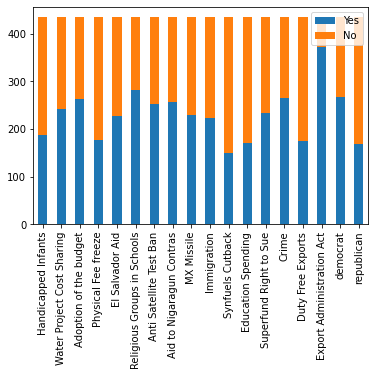

In [16]:
Yes = (df=='Yes').sum()
No = (df=='No').sum()
stat = pd.concat([Yes, No], axis = 1, keys = ['Yes', 'No'])
ax = stat.plot.bar(stacked=True)
plt.show()

In [17]:
# Preprocessing the main dataset
survey = utils.data_prepare(df)

In [18]:
survey

[['Water Project Cost Sharing',
  'Physical Fee freeze',
  'El Salvador Aid',
  'Religious Groups in Schools',
  'Immigration',
  'Education Spending',
  'Superfund Right to Sue',
  'Crime',
  'Export Administration Act',
  'republican'],
 ['Water Project Cost Sharing',
  'Physical Fee freeze',
  'El Salvador Aid',
  'Religious Groups in Schools',
  'Education Spending',
  'Superfund Right to Sue',
  'Crime',
  'Export Administration Act',
  'republican'],
 ['Water Project Cost Sharing',
  'Adoption of the budget',
  'El Salvador Aid',
  'Religious Groups in Schools',
  'Synfuels Cutback',
  'Superfund Right to Sue',
  'Crime',
  'democrat'],
 ['Water Project Cost Sharing',
  'Adoption of the budget',
  'El Salvador Aid',
  'Religious Groups in Schools',
  'Synfuels Cutback',
  'Superfund Right to Sue',
  'Export Administration Act',
  'democrat'],
 ['Handicapped Infants',
  'Water Project Cost Sharing',
  'Adoption of the budget',
  'El Salvador Aid',
  'Religious Groups in Schools',


Applying Apriori Algorithm: the next step is to apply the Apriori algorithm on the dataset

In [19]:
# create association rule on the main dataset
Rules = list(apriori(survey, min_support = 0.3, min_confidence = 0.9))
associationRules = utils.extract(Rules)
rules_df = pd.DataFrame(associationRules, columns = ['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])

For a minimum support of 30% we have 602 rules

In [20]:
len(rules_df)

602

Plotting a bar chat to see the policies that has the highest support from either the democrat and republican

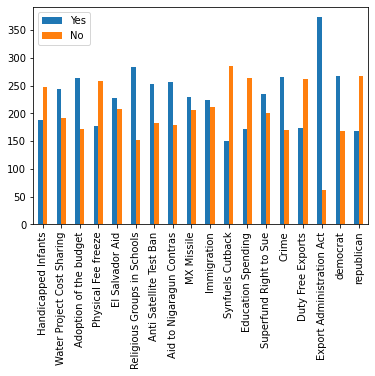

In [21]:
Yes = (df=='Yes').sum()
No = (df=='No').sum()
stat = pd.concat([Yes, No], axis = 1, keys = ['Yes', 'No'])
ax = stat.plot.bar()
plt.show()

In [22]:
#Rules = list(apriori(survey, min_support = 0.1, min_confidence = 0.5))
#associationRules = utils.extract(Rules, 'Duty Free Exports', 3)
#utils.inspect(associationRules)

In [23]:
# Using lambda function for partial string matching/filtering

democrat_policies = rules_df[rules_df['RHS'].apply(lambda x: 'democrat' in x)].sort_values(by=['Lift'], ascending = False)

In [24]:
democrat_policies

,LHS,RHS,Support,Confidence,Lift
261,"[MX Missile, Duty Free Exports]","[Aid to Nigaragun Contras, democrat]",0.305747,0.943262,1.848284
480,"[MX Missile, Export Administration Act, Duty F...","[Aid to Nigaragun Contras, democrat]",0.301149,0.942446,1.846685
478,"[MX Missile, Duty Free Exports]","[Aid to Nigaragun Contras, Export Administrati...",0.301149,0.929078,1.837041
567,"[MX Missile, Adoption of the budget, Anti Sate...","[Aid to Nigaragun Contras, Export Administrati...",0.388506,0.928571,1.836039
572,"[MX Missile, Export Administration Act, Adopti...","[Aid to Nigaragun Contras, democrat]",0.388506,0.928571,1.819498
...,...,...,...,...,...
207,"[Export Administration Act, Adoption of the bu...",[democrat],0.443678,0.910377,1.483199
35,"[Adoption of the budget, Anti Satellite Test Ban]",[democrat],0.443678,0.910377,1.483199
18,[MX Missile],[democrat],0.475862,0.903930,1.472695
141,"[MX Missile, Export Administration Act]",[democrat],0.466667,0.902222,1.469913


In [25]:
# Using lambda function for partial string matching/filtering

republican_policies = rules_df[rules_df['RHS'].apply(lambda x: 'republican' in x)].sort_values(by=['Lift'], ascending = False)

In [26]:
republican_policies

,LHS,RHS,Support,Confidence,Lift
486,"[Physical Fee freeze, Education Spending]","[Crime, republican, El Salvador Aid]",0.301149,0.929078,2.557905
366,"[Physical Fee freeze, Education Spending]","[republican, El Salvador Aid]",0.303448,0.936170,2.545213
488,"[Physical Fee freeze, Crime, Education Spending]","[republican, El Salvador Aid]",0.301149,0.935714,2.543973
587,"[Physical Fee freeze, Crime, Superfund Right t...","[republican, El Salvador Aid]",0.301149,0.916084,2.490603
300,"[Physical Fee freeze, Education Spending]","[Crime, republican]",0.305747,0.943262,2.486783
529,"[Physical Fee freeze, Crime, Superfund Right t...","[republican, El Salvador Aid]",0.319540,0.914474,2.486225
490,"[Physical Fee freeze, Education Spending, El S...","[Crime, republican]",0.301149,0.942446,2.484630
558,"[Physical Fee freeze, Superfund Right to Sue, ...","[republican, El Salvador Aid]",0.305747,0.910959,2.476670
517,"[Physical Fee freeze, Crime, Religious Groups ...","[republican, El Salvador Aid]",0.328736,0.910828,2.476314
386,"[Physical Fee freeze, Superfund Right to Sue]","[republican, El Salvador Aid]",0.324138,0.909677,2.473185
